# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 25.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
147427,0.0049,0.0024,0.0049,0.0024,0.0049,0.0024,0.0684,0.0610,0.0049,0.1147,0,0,0,0
84018,0.3882,0.0952,0.0024,0.0049,0.0024,0.0586,0.2344,1.3623,0.0049,0.1147,10,10,10,10
372600,0.0708,0.0024,0.0049,0.0024,0.0049,0.0024,0.0171,0.1489,0.0024,0.0317,0,0,0,0
448427,0.0073,0.0024,0.0049,0.0049,0.0049,0.0049,0.0977,0.0122,0.0269,0.0024,0,0,0,0
406293,0.8032,0.0195,0.0220,0.0806,0.0122,0.0439,0.1025,0.5273,0.0195,0.0195,4,4,18,18


In [3]:
raw_data.shape

(469821, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469821 entries, 0 to 469820
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          469821 non-null  float64
 1   Emg2          469821 non-null  float64
 2   Emg3          469821 non-null  float64
 3   Emg4          469821 non-null  float64
 4   Emg5          469821 non-null  float64
 5   Emg6          469821 non-null  float64
 6   Emg7          469821 non-null  float64
 7   Emg8          469821 non-null  float64
 8   Emg9          469821 non-null  float64
 9   Emg10         469821 non-null  float64
 10  repetition    469821 non-null  int64  
 11  rerepetition  469821 non-null  int64  
 12  stimulus      469821 non-null  int64  
 13  restimulus    469821 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.2 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000
mean,0.268114,0.156607,0.128820,0.109278,0.020653,0.037569,0.349515,0.402672,0.131860,0.270130,3.156387,2.382701,5.594729,4.278744
std,0.324583,0.297356,0.288758,0.312210,0.053065,0.090803,0.522189,0.513143,0.335658,0.439442,3.483117,3.324333,6.577557,6.291936
min,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.061000,0.002400,0.004900,0.002400,0.004900,0.002400,0.078100,0.102500,0.002400,0.012200,0.000000,0.000000,0.000000,0.000000
50%,0.153800,0.019500,0.004900,0.004900,0.004900,0.007300,0.178200,0.251500,0.004900,0.100100,2.000000,0.000000,3.000000,0.000000
75%,0.361300,0.168500,0.144000,0.048800,0.007300,0.036600,0.397900,0.488300,0.112300,0.356400,6.000000,5.000000,10.000000,8.000000
max,4.643600,4.147900,4.638700,4.643600,1.992200,2.661100,4.641100,4.646000,4.638700,4.638700,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     200217
8      15593
7      15585
2      15581
4      15579
12     15577
9      15553
11     15552
6      15541
5      15533
3      15531
10     15525
1      15505
14     10403
17     10402
13     10386
15     10360
16     10325
18      5198
21      5198
19      5193
23      5163
20      5161
22      5160
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

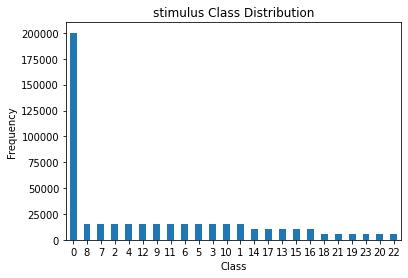

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
448993,0.0342,0.0024,0.0049,0.0513,0.0415,0.0635,0.0049,0.1855,0.0024,0.0366,0,0,0,0
434752,0.0024,0.0024,0.0049,0.0049,0.0024,0.0049,0.0024,0.0024,0.0024,0.0024,0,0,0,0
143608,0.5176,0.5737,0.5713,0.8203,0.0806,0.1001,2.0264,1.0791,0.4028,1.3428,10,10,5,5
312099,0.6836,0.2856,0.0049,0.1245,0.0049,0.0488,0.1172,0.2808,0.0024,0.2368,1,1,8,8
263605,0.0171,0.0024,0.0024,0.0024,0.0049,0.0024,0.0659,0.2930,0.0024,0.0684,0,0,0,0


In [12]:
raw_data.shape

(394034, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394034 entries, 0 to 469820
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          394034 non-null  float64
 1   Emg2          394034 non-null  float64
 2   Emg3          394034 non-null  float64
 3   Emg4          394034 non-null  float64
 4   Emg5          394034 non-null  float64
 5   Emg6          394034 non-null  float64
 6   Emg7          394034 non-null  float64
 7   Emg8          394034 non-null  float64
 8   Emg9          394034 non-null  float64
 9   Emg10         394034 non-null  float64
 10  repetition    394034 non-null  int64  
 11  rerepetition  394034 non-null  int64  
 12  stimulus      394034 non-null  int64  
 13  restimulus    394034 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 45.1 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# Scalling Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = StandardScaler().fit_transform(X)

# Indipendent Component Analysis (ICA)

https://www.nmr.mgh.harvard.edu/mne/0.14/manual/preprocessing/ica.html

In [18]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=10)
X_ica = ica.fit_transform(X)

In [19]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

In [20]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
y_pred1 = tree.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 85.8210565051328


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     39171
           1       0.77      0.77      0.77      1948
           2       0.79      0.78      0.79      2393
           3       0.75      0.76      0.76      2279
           4       0.78      0.79      0.79      2303
           5       0.75      0.78      0.76      2129
           6       0.87      0.86      0.86      2103
           7       0.81      0.80      0.81      2131
           8       0.81      0.81      0.81      2256
           9       0.72      0.73      0.73      2332
          10       0.63      0.65      0.64      2518
          11       0.82      0.81      0.81      2252
          12       0.70      0.72      0.71      2438
          13       0.80      0.80      0.80      1487
          14       0.79      0.80      0.79      1393
          15       0.75      0.74      0.74      1511
          16       0.81      0.81      0.81      1565
 

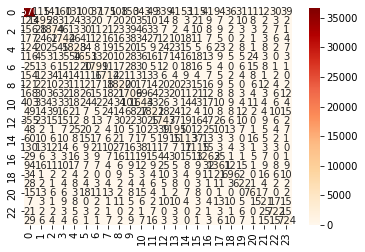

In [23]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.0282208433261004
MSE: 11.133566815130635
RMSE: 3.3366999887809263


In [25]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.858788161901637
Recall Score :  0.858210565051328
f1_score :  0.8584671146234414


# KNeighborsClassifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 94.71366756760187


Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     39171
           1       0.93      0.92      0.93      1948
           2       0.95      0.91      0.93      2393
           3       0.93      0.90      0.92      2279
           4       0.95      0.91      0.93      2303
           5       0.95      0.92      0.94      2129
           6       0.98      0.96      0.97      2103
           7       0.95      0.90      0.92      2131
           8       0.95      0.93      0.94      2256
           9       0.94      0.89      0.91      2332
          10       0.89      0.80      0.84      2518
          11       0.95      0.94      0.95      2252
          12       0.91      0.82      0.86      2438
          13       0.97      0.94      0.96      1487
          14       0.95      0.91      0.93      1393
          15       0.93      0.90      0.91      1511
          16       0.96      0.93      0.95      1565
 

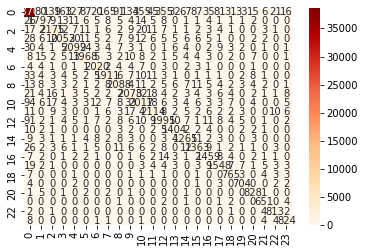

In [29]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [30]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.4184019186112909
MSE: 4.669724770642202
RMSE: 2.1609545970802353


In [31]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.9469693644207043
Recall Score :  0.9471366756760187
f1_score :  0.9465319674399008


# ExtraTreesClassifier

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [33]:
y_pred5 = extratree.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 95.48263479132565


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     39171
           1       0.98      0.92      0.95      1948
           2       0.98      0.91      0.94      2393
           3       0.97      0.89      0.92      2279
           4       0.98      0.92      0.95      2303
           5       0.97      0.94      0.96      2129
           6       0.99      0.97      0.98      2103
           7       0.97      0.90      0.93      2131
           8       0.98      0.93      0.95      2256
           9       0.96      0.90      0.93      2332
          10       0.93      0.81      0.87      2518
          11       0.97      0.96      0.96      2252
          12       0.95      0.83      0.88      2438
          13       0.99      0.94      0.97      1487
          14       0.97      0.93      0.95      1393
          15       0.96      0.90      0.93      1511
          16       0.99      0.96      0.97      1565
 

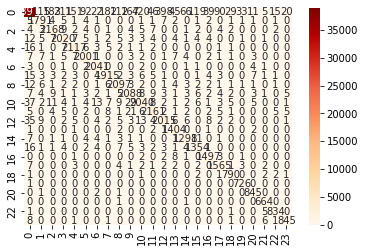

In [35]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [36]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.37329171266511857
MSE: 4.227974672300684
RMSE: 2.0562039471561873


In [37]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9556723752419938
Recall Score :  0.9548263479132565
f1_score :  0.9542445400198114


# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 94.5004885352824


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     39171
           1       0.96      0.91      0.93      1948
           2       0.96      0.90      0.92      2393
           3       0.95      0.87      0.91      2279
           4       0.95      0.89      0.92      2303
           5       0.95      0.92      0.94      2129
           6       0.98      0.96      0.97      2103
           7       0.94      0.89      0.91      2131
           8       0.96      0.91      0.93      2256
           9       0.94      0.88      0.91      2332
          10       0.89      0.79      0.84      2518
          11       0.96      0.94      0.95      2252
          12       0.92      0.81      0.87      2438
          13       0.98      0.92      0.95      1487
          14       0.96      0.92      0.94      1393
          15       0.94      0.89      0.91      1511
          16       0.96      0.94      0.95      1565
 

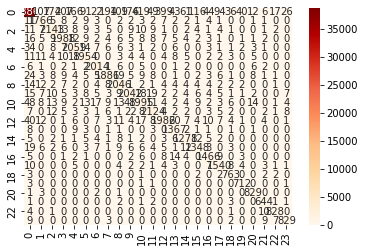

In [41]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [42]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.4327280571522834
MSE: 4.8409151471316
RMSE: 2.2002079781537924


In [43]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9452624858248369
Recall Score :  0.945004885352824
f1_score :  0.9442364367427335


# XGBoost

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:21:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [45]:
y_pred4 = xgb.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 89.6760440062431


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     39171
           1       0.89      0.81      0.85      1948
           2       0.90      0.82      0.86      2393
           3       0.86      0.78      0.82      2279
           4       0.87      0.80      0.84      2303
           5       0.85      0.81      0.83      2129
           6       0.94      0.91      0.92      2103
           7       0.87      0.83      0.85      2131
           8       0.89      0.82      0.85      2256
           9       0.80      0.72      0.76      2332
          10       0.75      0.65      0.70      2518
          11       0.88      0.85      0.86      2252
          12       0.83      0.72      0.77      2438
          13       0.90      0.84      0.87      1487
          14       0.87      0.84      0.85      1393
          15       0.83      0.80      0.81      1511
          16       0.89      0.84      0.87      1565
 

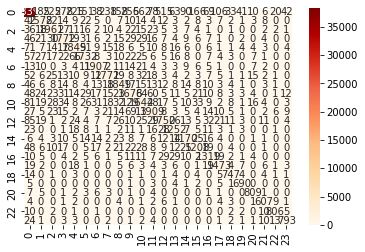

In [47]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [48]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 0.7330947758447853
MSE: 7.792848351034807
RMSE: 2.791567364588361


In [49]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.8948227161114496
Recall Score :  0.896760440062431
f1_score :  0.8945666174347329
